In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, silhouette_score
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean

# Sample Data
documents = [
    "I love programming in Python",
    "Python is great for data science",
    "Machine learning with Python",
    "I enjoy coding in Java",
    "Java is a versatile programming language",
    "Java and Python are popular languages"
]

# Step 1: Bag of Words Representation
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(documents).toarray()

# Step 2: Clustering with K-Means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_bow)
labels = kmeans.labels_

# Calculate Within Sum of Squares
wss = kmeans.inertia_

# Calculate Silhouette Score for Evaluation
silhouette_avg = silhouette_score(X_bow, labels)

# Similarity Measures
# Jaccard Similarity (Example for first two documents)
jaccard_sim = jaccard_score(X_bow[0], X_bow[1], average='macro')

# Cosine Similarity
cosine_sim = cosine_similarity([X_bow[0]], [X_bow[1]])[0][0]

# Euclidean Distance
euclidean_dist = euclidean(X_bow[0], X_bow[1])

print("Within Sum of Squares (WSS):", wss)
print("Silhouette Score:", silhouette_avg)
print("Jaccard Similarity:", jaccard_sim)
print("Cosine Similarity:", cosine_sim)
print("Euclidean Distance:", euclidean_dist)


Within Sum of Squares (WSS): 15.200000000000003
Silhouette Score: 0.06708079641547215
Jaccard Similarity: 0.3555555555555555
Cosine Similarity: 0.20412414523193154
Euclidean Distance: 2.8284271247461903


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Within Sum of Squares (WSS): 0.001126070972532034
Silhouette Score: 0.08613043278455734


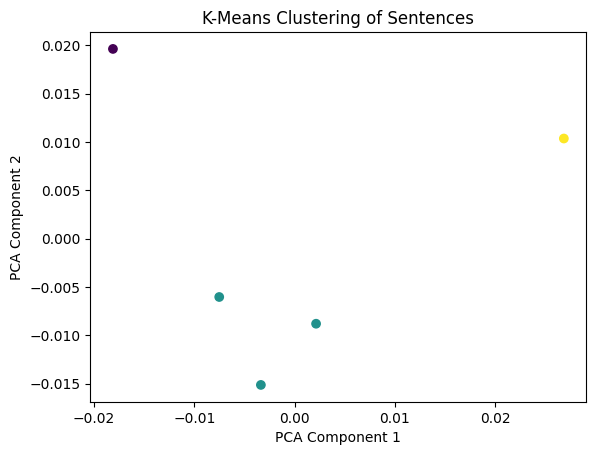

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Load your text dataset
text_data = [
    "This is a sample sentence.",
    "Another example of a sentence.",
    "More sentences to analyze similarities.",
    "Yet another sentence in the dataset.",
    "Sentence similarity comparison with embeddings."
]

# Preprocess the dataset
preprocessed_data = [' '.join(preprocess_text(sentence)) for sentence in text_data]

# Bag of Words Representation
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(preprocessed_data).toarray()

# Word2Vec Embeddings
sentences = [preprocess_text(sentence) for sentence in text_data]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)
X_w2v = np.array([np.mean([word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for sentence in sentences])

# Calculate Similarity Measures
cosine_sim = 1 - pairwise_distances(X_w2v, metric='cosine')
euclidean_dist = pairwise_distances(X_w2v, metric='euclidean')

# K-Means Clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_w2v)
labels = kmeans.labels_

# Evaluate Clustering with Within Sum of Squares (WSS)
wss = kmeans.inertia_
print(f"Within Sum of Squares (WSS): {wss}")

# Silhouette Score
silhouette_avg = silhouette_score(X_w2v, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize Clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_w2v)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering of Sentences')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


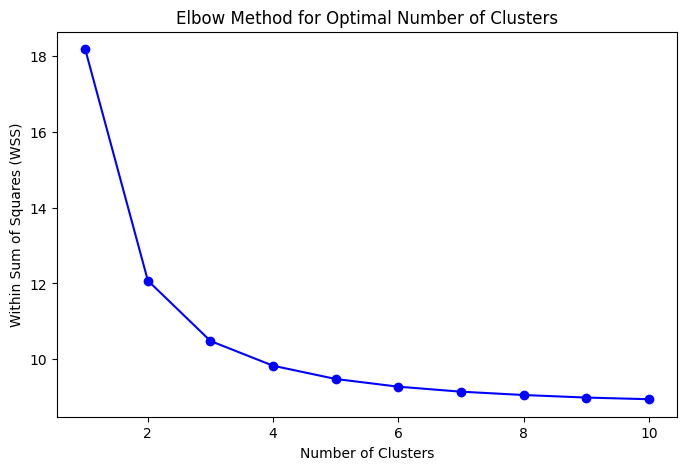

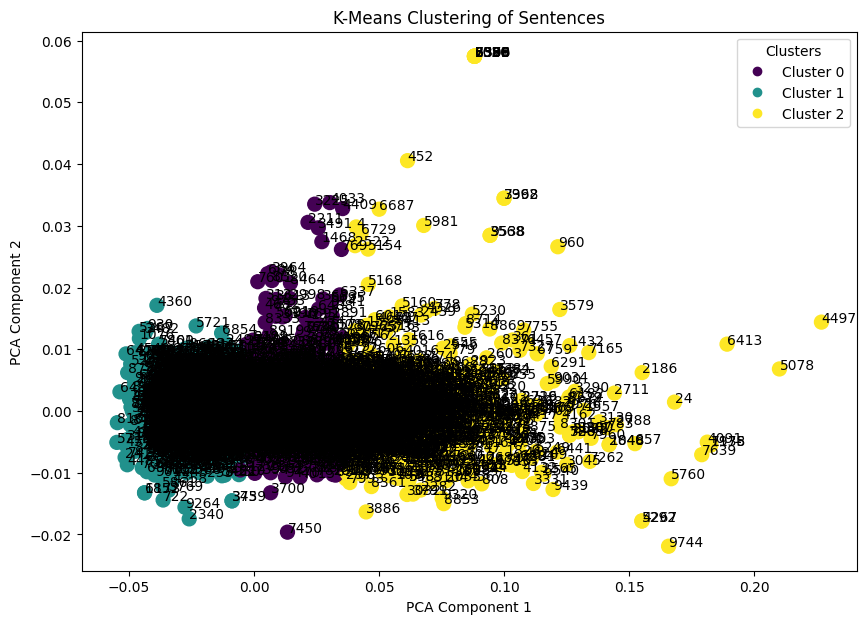

Sentence 1 and Sentence 2 Similarity Measures:
  Jaccard Similarity: 0.0000
  Euclidean Distance: 0.0352
  Cosine Similarity: 0.7372

Sentence 1 and Sentence 3 Similarity Measures:
  Jaccard Similarity: 0.0000
  Euclidean Distance: 0.0592
  Cosine Similarity: 0.8410

Sentence 1 and Sentence 4 Similarity Measures:
  Jaccard Similarity: 0.0000
  Euclidean Distance: 0.0355
  Cosine Similarity: 0.8311

Sentence 1 and Sentence 5 Similarity Measures:
  Jaccard Similarity: 0.0000
  Euclidean Distance: 0.0624
  Cosine Similarity: 0.7897

Sentence 1 and Sentence 6 Similarity Measures:
  Jaccard Similarity: 0.0000
  Euclidean Distance: 0.0519
  Cosine Similarity: 0.3260

Sentence 1 and Sentence 7 Similarity Measures:
  Jaccard Similarity: 0.0000
  Euclidean Distance: 0.0668
  Cosine Similarity: 0.7927

Sentence 1 and Sentence 8 Similarity Measures:
  Jaccard Similarity: 0.0000
  Euclidean Distance: 0.0361
  Cosine Similarity: 0.7451

Sentence 1 and Sentence 9 Similarity Measures:
  Jaccard Simil

/usr/local/lib/python3.10/dist-packages/scipy/spatial/distance.py:647: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


Streaming output truncated to the last 5000 lines.
Sentence 30 and Sentence 4296 Similarity Measures:
  Jaccard Similarity: 0.0000
  Euclidean Distance: 0.0518
  Cosine Similarity: 0.3960

Sentence 30 and Sentence 4297 Similarity Measures:
  Jaccard Similarity: 0.0000
  Euclidean Distance: 0.0581
  Cosine Similarity: 0.3861

Sentence 30 and Sentence 4298 Similarity Measures:
  Jaccard Similarity: 0.0000
  Euclidean Distance: 0.0441
  Cosine Similarity: 0.3313

Sentence 30 and Sentence 4299 Similarity Measures:
  Jaccard Similarity: 0.0000
  Euclidean Distance: 0.0703
  Cosine Similarity: 0.0619

Sentence 30 and Sentence 4300 Similarity Measures:
  Jaccard Similarity: 0.0000
  Euclidean Distance: 0.0676
  Cosine Similarity: 0.3826

Sentence 30 and Sentence 4301 Similarity Measures:
  Jaccard Similarity: 0.0000
  Euclidean Distance: 0.0746
  Cosine Similarity: 0.3206

Sentence 30 and Sentence 4302 Similarity Measures:
  Jaccard Similarity: 0.0000
  Euclidean Distance: 0.0608
  Cosine Sim

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances, jaccard_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from scipy.spatial.distance import euclidean, cosine
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Load your text dataset
text_data = pd.read_csv("/content/samples.txt", sep='\t', header=None)

# Preprocess the dataset
preprocessed_data = [' '.join(preprocess_text(sentence)) for sentence in text_data.iloc[:, 0]]

# Word2Vec Embeddings
sentences = [preprocess_text(sentence) for sentence in text_data.iloc[:, 0]]
word2vec_model = Word2Vec(sentences, vector_size=20, window=5, min_count=1, sg=0)
X_w2v = np.array([np.mean([word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for sentence in sentences])

# Determine the optimal number of clusters using the Elbow Method
wss = []
k_range = range(1, min(11, len(X_w2v) + 1))
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_w2v)
    wss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wss, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Choose the optimal number of clusters (e.g., based on the elbow)
optimal_clusters = 3  # Adjust this based on the elbow plot

# K-Means Clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans.fit(X_w2v)
labels = kmeans.labels_

# Visualize Clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_w2v)

# Plotting the clustered sentences
plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o', s=100)
plt.title('K-Means Clustering of Sentences')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Adding labels for each point
for i, sentence in enumerate(preprocessed_data):
    plt.annotate(str(i), (reduced_data[i, 0], reduced_data[i, 1]))

# Add legend
handles, _ = scatter.legend_elements()
plt.legend(handles, [f"Cluster {i}" for i in range(optimal_clusters)], title="Clusters")
plt.show()

# Similarity Measures
def calculate_similarity_measures(sentences):
    # Bag of Words Representation
    vectorizer = CountVectorizer()
    X_bow = vectorizer.fit_transform(preprocessed_data).toarray()

    for i in range(len(sentences)):
        for j in range(i + 1, len(sentences)):
            sentence1 = sentences[i]
            sentence2 = sentences[j]

            # Jaccard Similarity
            set1 = set(sentence1)
            set2 = set(sentence2)
            jaccard_sim = len(set1.intersection(set2)) / len(set1.union(set2))

            # Euclidean Distance
            euc_dist = euclidean(X_w2v[i], X_w2v[j])

            # Cosine Similarity
            cos_sim = 1 - cosine(X_w2v[i], X_w2v[j])

            print(f"Sentence {i+1} and Sentence {j+1} Similarity Measures:")
            print(f"  Jaccard Similarity: {jaccard_sim:.4f}")
            print(f"  Euclidean Distance: {euc_dist:.4f}")
            print(f"  Cosine Similarity: {cos_sim:.4f}\n")

# Calculate and display similarity measures
calculate_similarity_measures(sentences)
